In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import math
from keras.layers import Dense
from keras.layers import GRU,LSTM,RNN, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## **Import whole data:**

In [2]:
df=pd.read_csv("/content/Brazil (1).csv", engine='python')


## **Choose the country and new cases:**

In [3]:
df=df[df['location']=='United Kingdom']
df=df[['date','new_cases']]

In [4]:
df

,date,new_cases
16424,2019-12-31,0.0
16425,2020-01-01,0.0
16426,2020-01-02,0.0
16427,2020-01-03,0.0
16428,2020-01-04,0.0
...,...,...
16707,2020-10-09,17540.0
16708,2020-10-10,13864.0
16709,2020-10-11,15165.0
16710,2020-10-12,12872.0


## **Plot Figures:**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


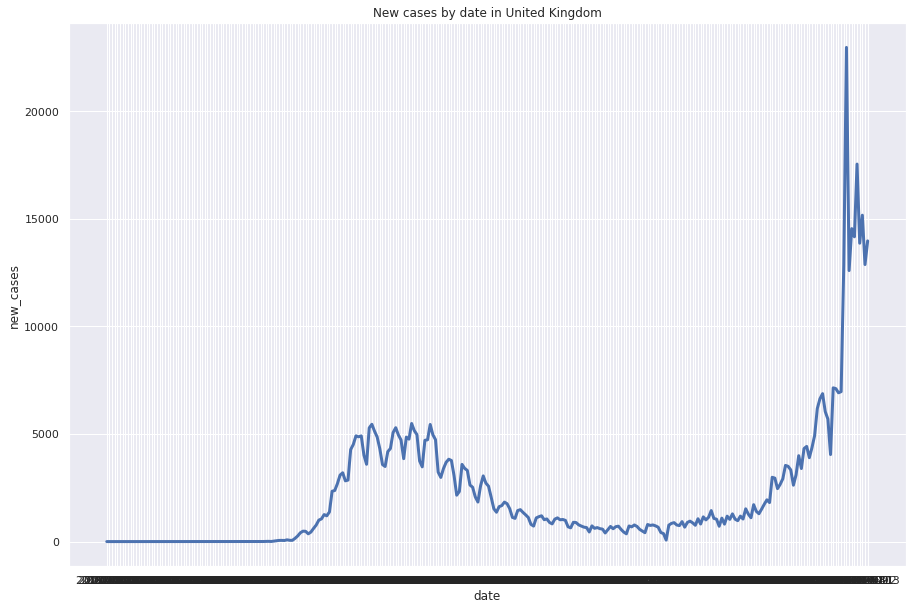

In [5]:
# plt.figure(figsize=(20,15))
# plt.subplot(211)
# plt.plot(df['date'],df['new_cases'])

sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots (figsize=(15,10))
sns.lineplot ('date','new_cases', data=df, linewidth=3)
plt.title ('New cases by date in United Kingdom')
plt.show()

#plt.figure(figsize=(20,10))
#plt.subplot(212)
#plt.plot(df_['date'],df_['new_deaths'],'r')
#plt.show()


# **Data Preprocessing:**

In [6]:
case_series=df['new_cases'].astype('float32')
case_series=pd.DataFrame(case_series)



In [7]:
case_series=case_series.fillna(0)
case_series

,new_cases
16424,0.0
16425,0.0
16426,0.0
16427,0.0
16428,0.0
...,...
16707,17540.0
16708,13864.0
16709,15165.0
16710,12872.0


In [8]:
import numpy
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
timestep=3
X_case, y_case = create_dataset(case_series, timestep)


In [10]:
train_size=int(len(case_series)*0.85)

In [11]:
x_case_train,x_case_valid=X_case[:train_size,:],X_case[train_size:,:]
y_case_train,y_case_valid=y_case[:train_size],y_case[train_size:]


In [12]:
n_features = 1
x_case_train = x_case_train.reshape((x_case_train.shape[0], x_case_train.shape[1], n_features))

#x_case_test=x_case_test.reshape((x_case_test.shape[0], x_case_test.shape[1], n_features))


## **Model preperation:**

In [13]:

model = Sequential()
model.add((GRU(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
model.add((GRU(20,activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_case_train,y_case_train, epochs=600, verbose=2)

Epoch 1/600
8/8 - 0s - loss: 4136432.7500
Epoch 2/600
8/8 - 0s - loss: 3884209.7500
Epoch 3/600
8/8 - 0s - loss: 3712436.0000
Epoch 4/600
8/8 - 0s - loss: 3479917.0000
Epoch 5/600
8/8 - 0s - loss: 3201223.2500
Epoch 6/600
8/8 - 0s - loss: 2846917.2500
Epoch 7/600
8/8 - 0s - loss: 2385286.2500
Epoch 8/600
8/8 - 0s - loss: 1603346.1250
Epoch 9/600
8/8 - 0s - loss: 691363.4375
Epoch 10/600
8/8 - 0s - loss: 255273.1094
Epoch 11/600
8/8 - 0s - loss: 195304.2969
Epoch 12/600
8/8 - 0s - loss: 220078.0781
Epoch 13/600
8/8 - 0s - loss: 158843.7969
Epoch 14/600
8/8 - 0s - loss: 157096.9219
Epoch 15/600
8/8 - 0s - loss: 156252.7031
Epoch 16/600
8/8 - 0s - loss: 152429.7656
Epoch 17/600
8/8 - 0s - loss: 154178.6562
Epoch 18/600
8/8 - 0s - loss: 165282.7656
Epoch 19/600
8/8 - 0s - loss: 151318.5625
Epoch 20/600
8/8 - 0s - loss: 145307.0312
Epoch 21/600
8/8 - 0s - loss: 183432.6719
Epoch 22/600
8/8 - 0s - loss: 156960.2344
Epoch 23/600
8/8 - 0s - loss: 163558.7344
Epoch 24/600
8/8 - 0s - loss: 14470

# **Check validation data:**

In [14]:

case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[train_size-15:(train_size+timestep-15)])

x_input=numpy.array(x_input)



In [15]:
x_input

array([1077., 1040.,  713.], dtype=float32)

In [16]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<(len(case_series)-train_size)):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[641.4327]
1 day input [1040.      713.      641.4327]
[1040.      713.      641.4327]
[[[1040.    ]
  [ 713.    ]
  [ 641.4327]]]
1 day output [[853.6418]]
2 day input [713.     641.4327 853.6418]
[713.     641.4327 853.6418]
[[[713.    ]
  [641.4327]
  [853.6418]]]
2 day output [[836.0391]]
3 day input [641.4327 853.6418 836.0391]
[641.4327 853.6418 836.0391]
[[[641.4327]
  [853.6418]
  [836.0391]]]
3 day output [[864.22314]]
4 day input [853.6418  836.0391  864.22314]
[853.6418  836.0391  864.22314]
[[[853.6418 ]
  [836.0391 ]
  [864.22314]]]
4 day output [[777.7091]]
5 day input [836.0391  864.22314 777.7091 ]
[836.0391  864.22314 777.7091 ]
[[[836.0391 ]
  [864.22314]
  [777.7091 ]]]
5 day output [[682.63196]]
6 day input [864.22314 777.7091  682.63196]
[864.22314 777.7091  682.63196]
[[[864.22314]
  [777.7091 ]
  [682.63196]]]
6 day output [[632.36475]]
7 day input [777.7091  682.63196 632.36475]
[777.7091  682.63196 632.36475]
[[[777.7091 ]
  [682.63196]
  [632.36475]]]
7 day ou

In [17]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(train_size,train_size+(len(case_series)-train_size))


In [18]:
lst_output=numpy.array(lst_output)
lst_output

array([641.4327 , 853.6418 , 836.0391 , 864.22314, 777.7091 , 682.63196,
       632.36475, 614.489  , 540.73395, 471.4749 , 453.18216, 459.25693,
       409.22165, 359.9316 , 339.8412 , 334.60956, 293.34363, 257.57916,
       250.60599, 255.3751 , 231.23575, 205.66383, 191.4205 , 187.93977,
       174.31377, 158.18079, 146.19359, 147.58598, 154.20789, 163.8935 ,
       180.0708 , 201.16739, 225.25267, 249.23993, 262.29187, 267.6339 ,
       257.23502, 231.4537 , 203.35052, 191.48148, 195.04373, 181.40106,
       169.60219, 155.95624], dtype=float32)

No handles with labels found to put in legend.


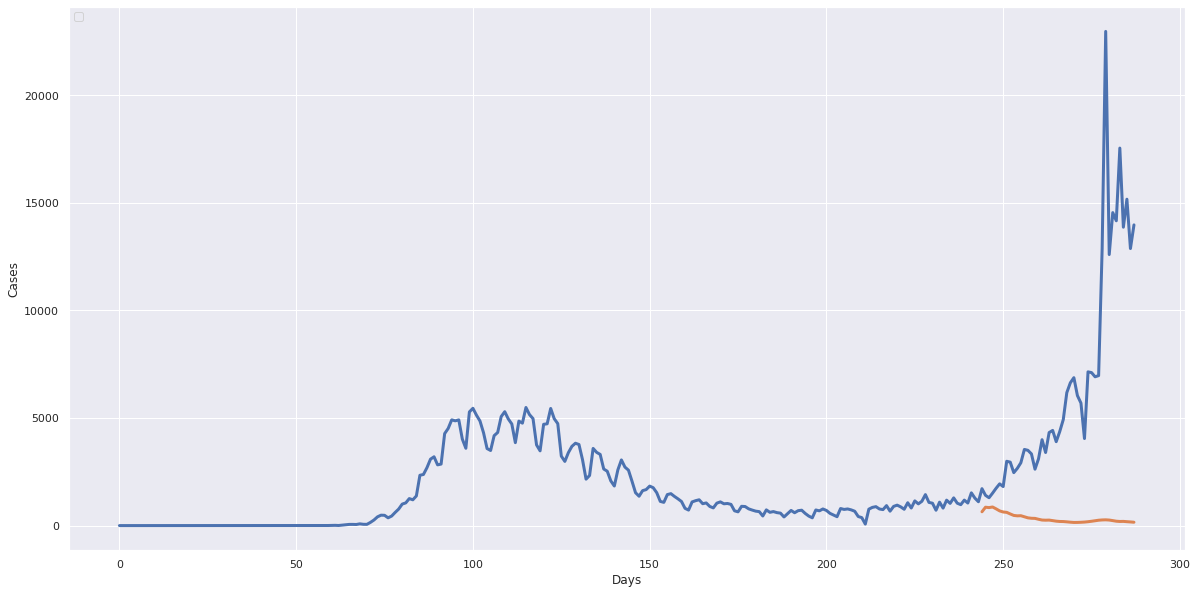

In [19]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting:

---



---



In [20]:
case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[-timestep:])
x_input=numpy.array(x_input)



In [21]:

x_input

array([15165., 12872., 13972.], dtype=float32)

In [22]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<40):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[14705.842]
1 day input [12872.    13972.    14705.842]
[12872.    13972.    14705.842]
[[[12872.   ]
  [13972.   ]
  [14705.842]]]
1 day output [[14186.989]]
2 day input [13972.    14705.842 14186.989]
[13972.    14705.842 14186.989]
[[[13972.   ]
  [14705.842]
  [14186.989]]]
2 day output [[12599.352]]
3 day input [14705.842 14186.989 12599.352]
[14705.842 14186.989 12599.352]
[[[14705.842]
  [14186.989]
  [12599.352]]]
3 day output [[10876.931]]
4 day input [14186.989 12599.352 10876.931]
[14186.989 12599.352 10876.931]
[[[14186.989]
  [12599.352]
  [10876.931]]]
4 day output [[10272.897]]
5 day input [12599.352 10876.931 10272.897]
[12599.352 10876.931 10272.897]
[[[12599.352]
  [10876.931]
  [10272.897]]]
5 day output [[10487.735]]
6 day input [10876.931 10272.897 10487.735]
[10876.931 10272.897 10487.735]
[[[10876.931]
  [10272.897]
  [10487.735]]]
6 day output [[9232.9795]]
7 day input [10272.897  10487.735   9232.9795]
[10272.897  10487.735   9232.9795]
[[[10272.897 ]
  [10487.

In [23]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(len(case_series)-1,len(case_series)+39)


No handles with labels found to put in legend.


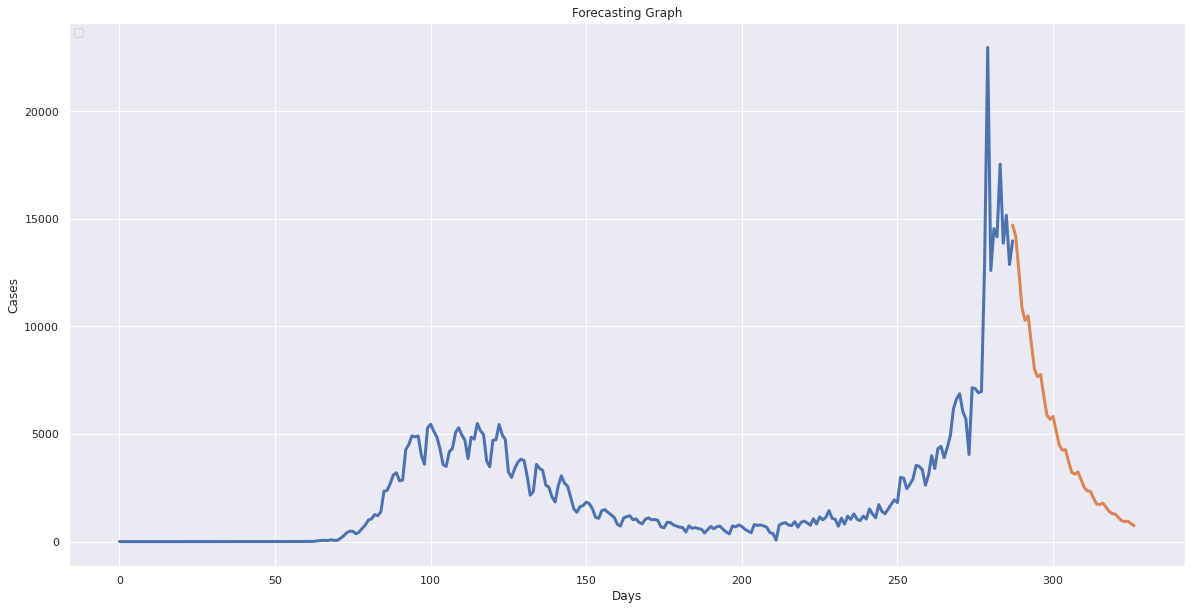

In [25]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.title('Forecasting Graph')
plt.show()